数据探索与可视化
实验目标
学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

In [1]:
#实验要求
#1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
import pandas as pd

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 设置显示选项，查看更多行和列
pd.set_option('display.max_rows', 100)  # 显示最多100行
pd.set_option('display.max_columns', 20)  # 显示最多20列
pd.set_option('display.width', 1000)  # 设置行的最大宽度
pd.set_option('display.max_colwidth', 200)  # 设置列宽度

# 查看数据的基本信息
print(data.info())

# 查看前10行数据
print(data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None
   label  type  site_admin  company   blog  location  hireable                 

In [2]:
#2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。
import pandas as pd

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 使用head()查看数据的前几行
print("数据的前几行:")
print(data.head())

# 使用info()查看每列的数据类型和非空值数量
print("\n数据的基本信息:")
print(data.info())

# 使用describe()生成数据的描述性统计信息
print("\n数据的描述性统计信息:")
print(data.describe())


数据的前几行:
   label  type  site_admin  company   blog  location  hireable                                                            bio  public_repos  public_gists  followers  following                 created_at                 updated_at  text_bot_count
0  Human  True       False    False  False     False     False                                                            NaN            26             1          5          1  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the program evolves...            30             3          9          6  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0
2  Human  True       False     True   True      True      True                     Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0
3    Bot

In [2]:
#3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
import pandas as pd

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 1. 日期格式化 - 将 'created_at' 和 'updated_at' 列转换为日期类型
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')  # 转换为日期
data['updated_at'] = pd.to_datetime(data['updated_at'], errors='coerce')  # 转换为日期

# 格式化日期为 'YYYY-MM-DD' 格式
data['created_at_formatted'] = data['created_at'].dt.strftime('%Y-%m-%d')
data['updated_at_formatted'] = data['updated_at'].dt.strftime('%Y-%m-%d')

# 2. 数字格式化 - 对 'followers' 和 'following' 列应用千位分隔符
data['followers_formatted'] = data['followers'].apply(lambda x: f"{x:,.0f}")  # 千位分隔符
data['following_formatted'] = data['following'].apply(lambda x: f"{x:,.0f}")  # 千位分隔符

# 查看格式化后的数据
print(data[['created_at', 'created_at_formatted', 'updated_at', 'updated_at_formatted', 
            'followers', 'followers_formatted', 'following', 'following_formatted']].head())
                  

                 created_at created_at_formatted                updated_at  \
0 2011-09-26 17:27:03+00:00           2011-09-26 2023-10-13 11:21:10+00:00   
1 2015-06-29 10:12:46+00:00           2015-06-29 2023-10-07 06:26:14+00:00   
2 2008-08-29 16:20:03+00:00           2008-08-29 2023-10-02 02:11:21+00:00   
3 2014-05-20 18:43:09+00:00           2014-05-20 2023-10-12 12:54:59+00:00   
4 2012-08-16 14:19:13+00:00           2012-08-16 2023-10-06 11:58:41+00:00   

  updated_at_formatted  followers followers_formatted  following  \
0           2023-10-13          5                   5          1   
1           2023-10-07          9                   9          6   
2           2023-10-02       1212               1,212        221   
3           2023-10-12         84                  84          2   
4           2023-10-06          6                   6          2   

  following_formatted  
0                   1  
1                   6  
2                 221  
3                   2  
4 

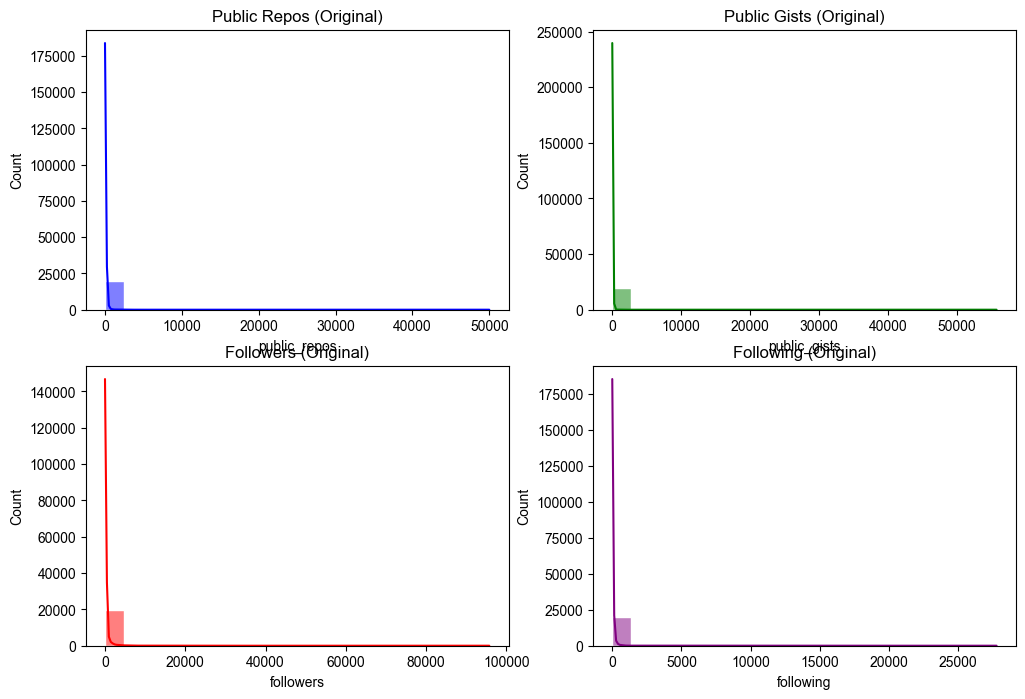

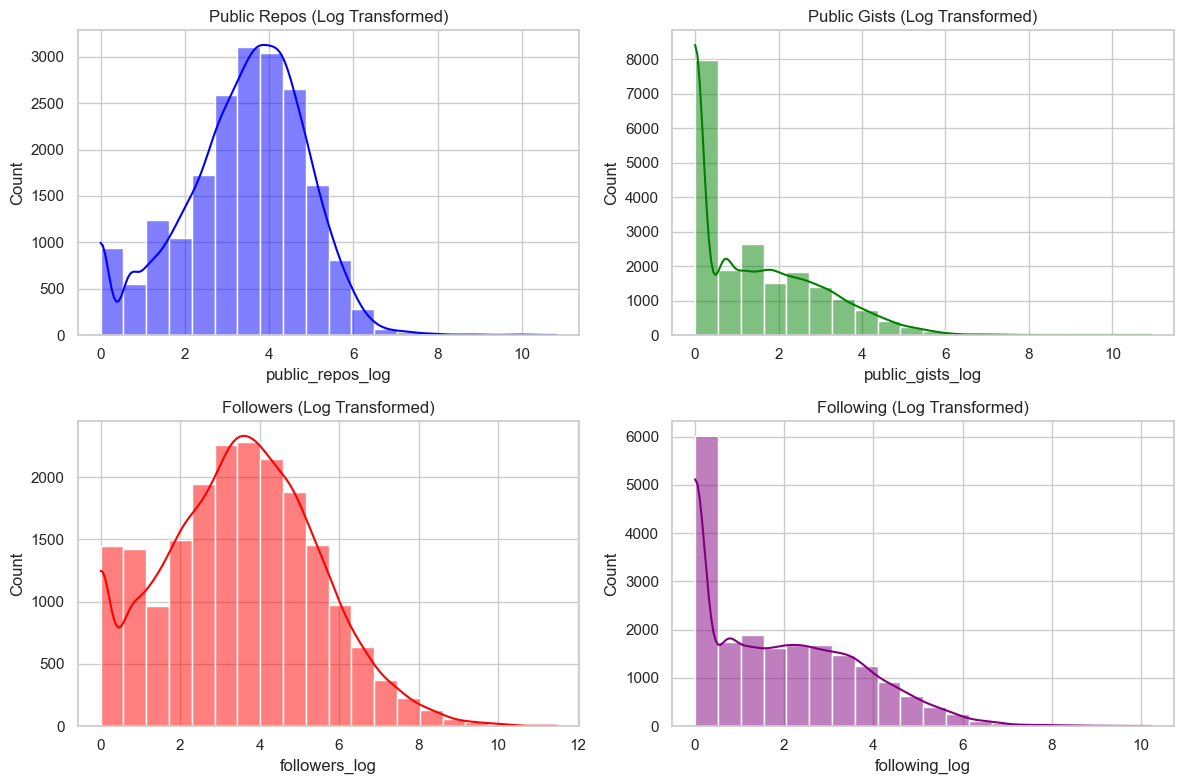

   public_repos  public_repos_log  public_gists  public_gists_log  followers  followers_log  following  following_log
0            26          3.295837             1          0.693147          5       1.791759          1       0.693147
1            30          3.433987             3          1.386294          9       2.302585          6       1.945910
2           103          4.644391            49          3.912023       1212       7.100852        221       5.402677
3            49          3.912023             0          0.000000         84       4.442651          2       1.098612
4            11          2.484907             1          0.693147          6       1.945910          2       1.098612


In [6]:
#4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 1. 对数变换 - 对 'public_repos', 'public_gists', 'followers', 'following' 进行对数变换
# 先加1避免对数零的情况，然后进行自然对数变换
data['public_repos_log'] = np.log1p(data['public_repos'])  # np.log1p(x) 等价于 log(x+1)
data['public_gists_log'] = np.log1p(data['public_gists'])
data['followers_log'] = np.log1p(data['followers'])
data['following_log'] = np.log1p(data['following'])

# 2. 可视化对数变换前后的分布
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 设置 seaborn 样式
sns.set(style="whitegrid")

# 画原始数据分布
sns.histplot(data['public_repos'], kde=True, ax=axes[0, 0], color='blue', bins=20)
axes[0, 0].set_title('Public Repos (Original)')

sns.histplot(data['public_gists'], kde=True, ax=axes[0, 1], color='green', bins=20)
axes[0, 1].set_title('Public Gists (Original)')

sns.histplot(data['followers'], kde=True, ax=axes[1, 0], color='red', bins=20)
axes[1, 0].set_title('Followers (Original)')

sns.histplot(data['following'], kde=True, ax=axes[1, 1], color='purple', bins=20)
axes[1, 1].set_title('Following (Original)')

# 对数变换后数据分布
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data['public_repos_log'], kde=True, ax=axes[0, 0], color='blue', bins=20)
axes[0, 0].set_title('Public Repos (Log Transformed)')

sns.histplot(data['public_gists_log'], kde=True, ax=axes[0, 1], color='green', bins=20)
axes[0, 1].set_title('Public Gists (Log Transformed)')

sns.histplot(data['followers_log'], kde=True, ax=axes[1, 0], color='red', bins=20)
axes[1, 0].set_title('Followers (Log Transformed)')

sns.histplot(data['following_log'], kde=True, ax=axes[1, 1], color='purple', bins=20)
axes[1, 1].set_title('Following (Log Transformed)')

plt.tight_layout()
plt.show()

# 查看变换后的数据
print(data[['public_repos', 'public_repos_log', 'public_gists', 'public_gists_log', 
            'followers', 'followers_log', 'following', 'following_log']].head())


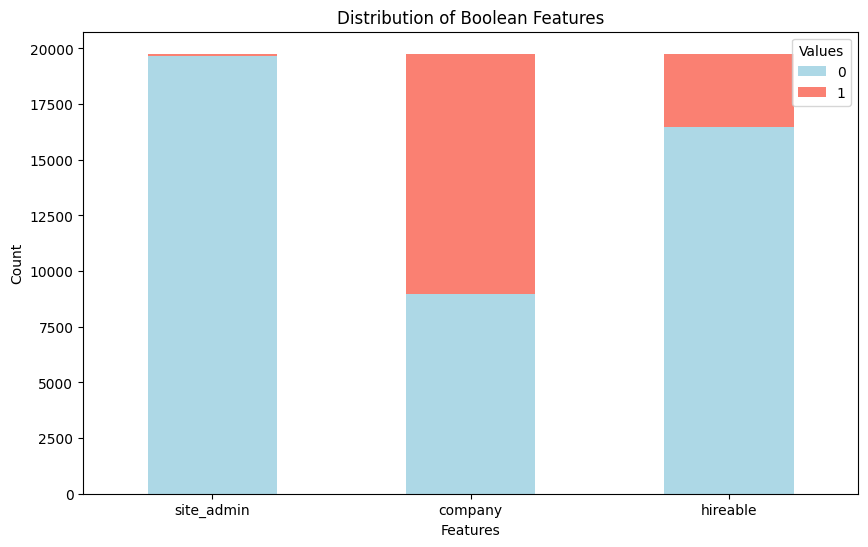

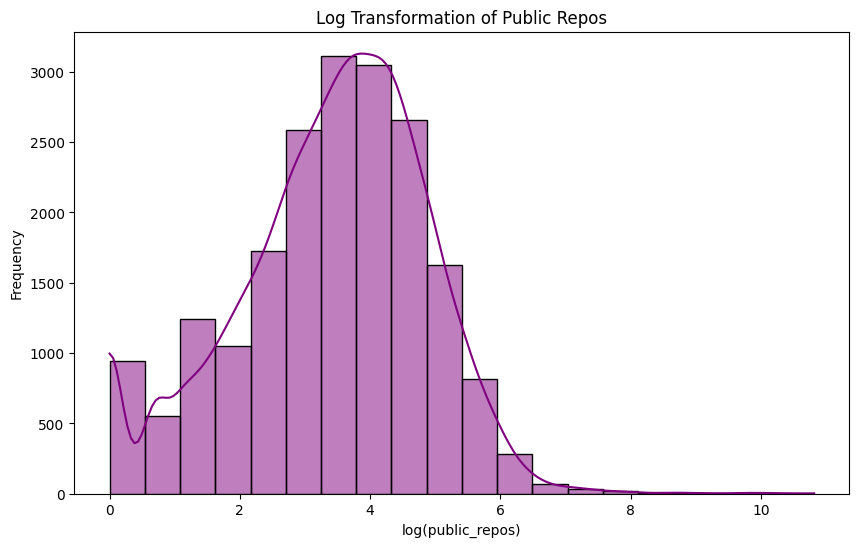

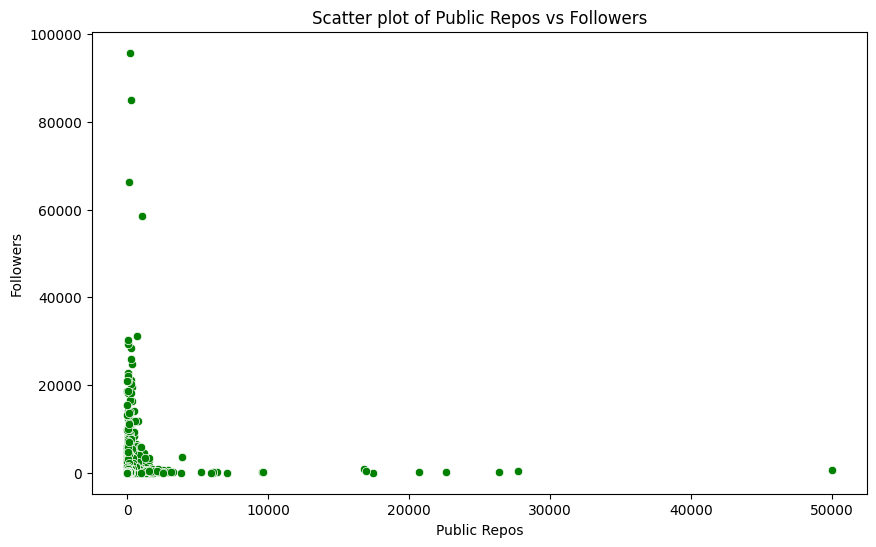

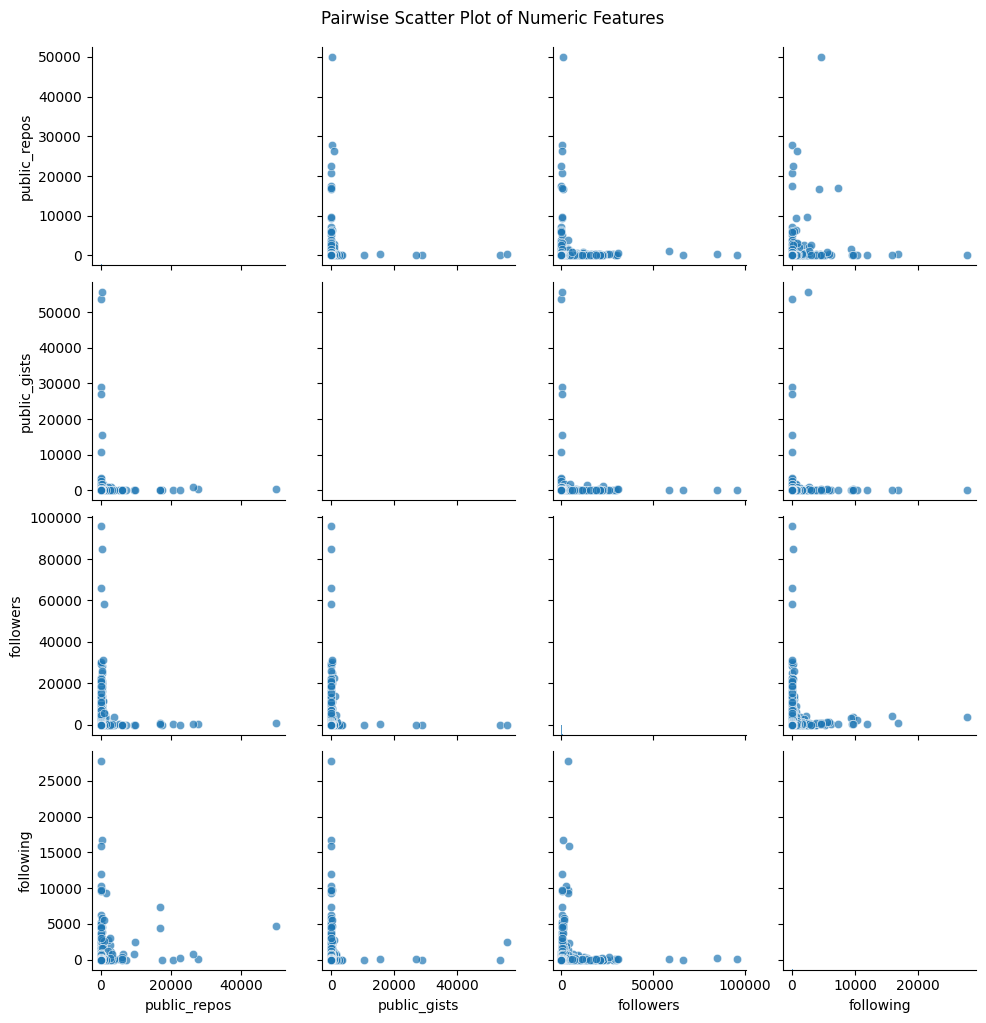

In [13]:
#5.使用Matplotlib绘制图表
#绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
#绘制直方图：展示log_public_repos的对数变换后的数据分布。
#绘制散点图：展示public_repos与followers之间的关系。
#绘制散点矩阵：展示多个数值型特征之间的成对关系。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 1. 绘制堆积柱状图：展示多个布尔特征的分布
# 选择布尔特征列
bool_columns = ['site_admin', 'company', 'hireable']  # 可以根据需要调整选择的列

# 使用 groupby 对布尔列进行计数
bool_data = data[bool_columns].apply(pd.Series.value_counts).T

# 绘制堆积柱状图
bool_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Distribution of Boolean Features')
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=0)
plt.legend(title='Values', labels=['0', '1'])
plt.show()

# 2. 绘制直方图：展示 log_public_repos 的对数变换后的数据分布
# 假设已经进行对数变换并存在 log_public_repos 列
data['log_public_repos'] = np.log1p(data['public_repos'])

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['log_public_repos'], kde=True, color='purple', bins=20)
plt.title('Log Transformation of Public Repos')
plt.xlabel('log(public_repos)')
plt.ylabel('Frequency')
plt.show()

# 3. 绘制散点图：展示 public_repos 与 followers 之间的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(x='public_repos', y='followers', data=data, color='green')
plt.title('Scatter plot of Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 4. 绘制散点矩阵：展示多个数值型特征之间的成对关系
# 选择数值型特征列
numeric_columns = ['public_repos', 'public_gists', 'followers', 'following']

# 绘制散点矩阵
sns.pairplot(data[numeric_columns], kind='scatter', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Scatter Plot of Numeric Features', y=1.02)
plt.show()


Original data size: (19768, 15)
Number of rows with followers <= 0: 1445
Cleaned data size: (18323, 15)


C:\Users\李晨语\AppData\Local\Temp\ipykernel_16616\2907015194.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['log_followers'] = np.log1p(cleaned_data['followers'])
C:\Users\李晨语\AppData\Local\Temp\ipykernel_16616\2907015194.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['log_public_repos'] = np.log1p(cleaned_data['public_repos'])
C:\Users\李晨语\AppData\Local\Temp\ipykernel_16616\2907015194.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

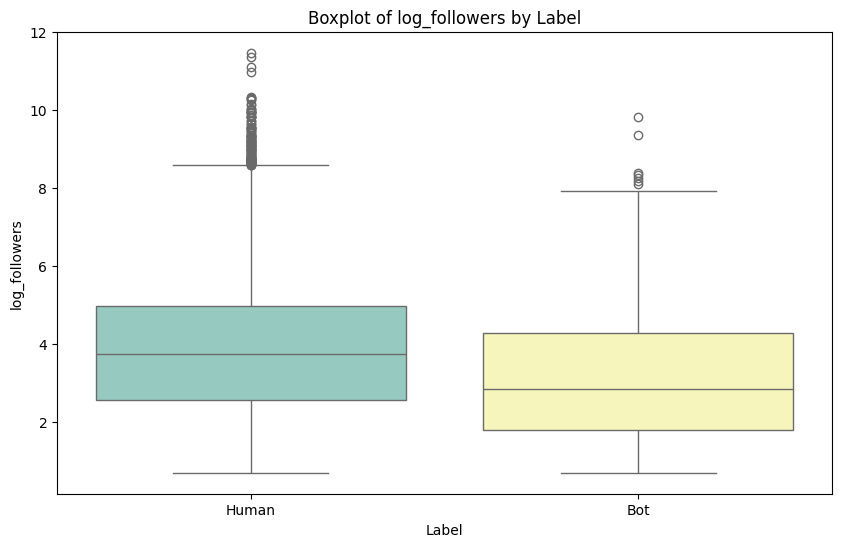

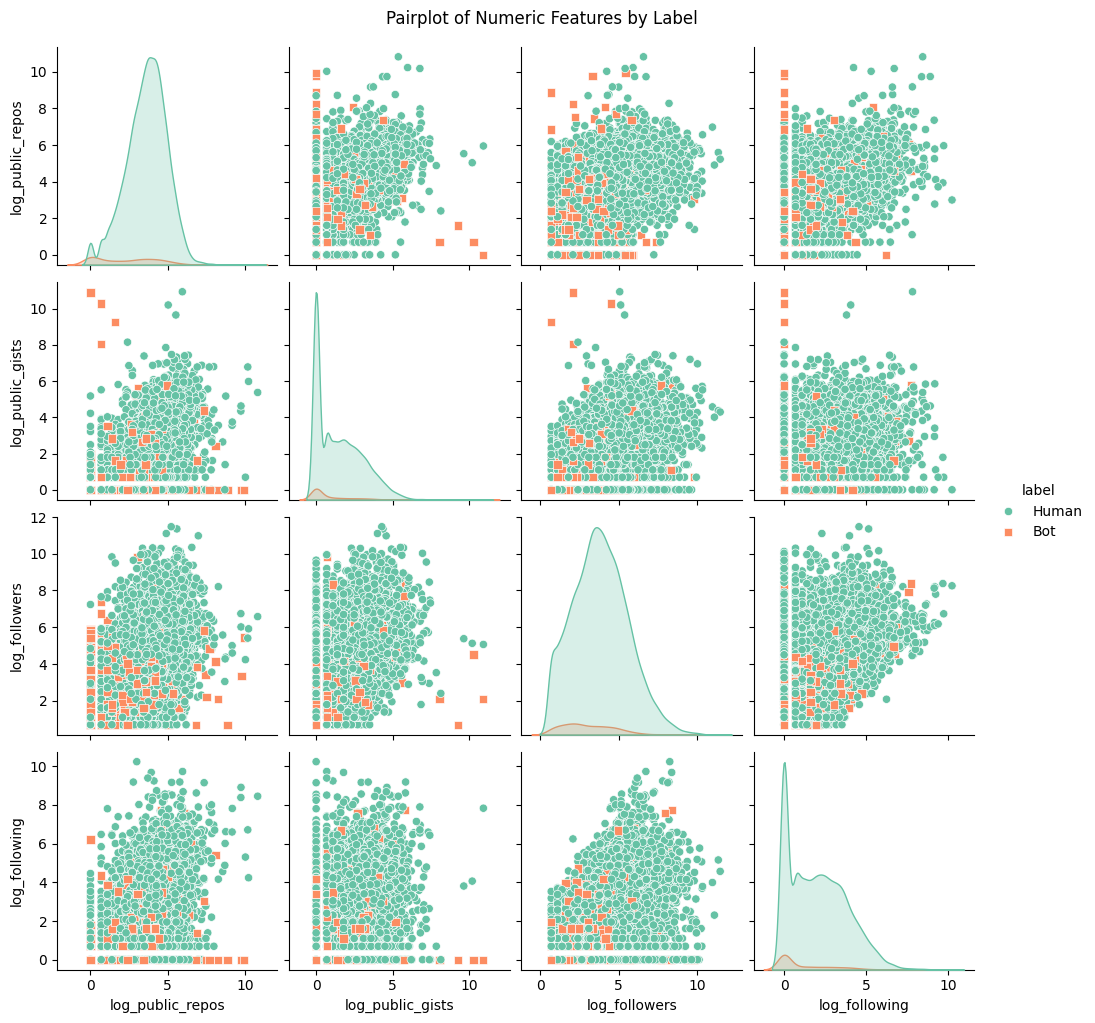

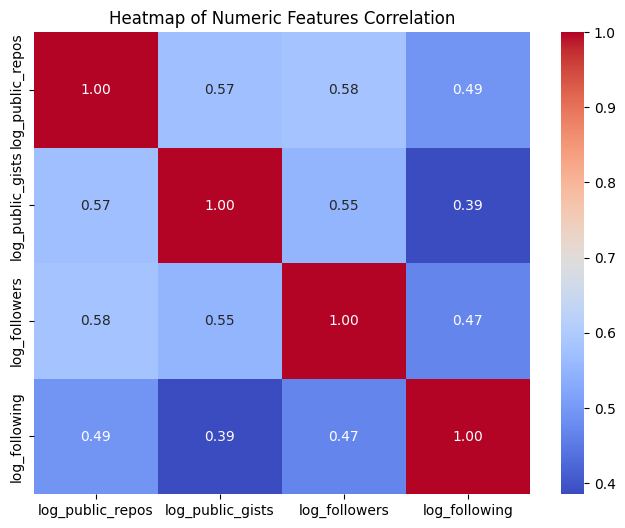

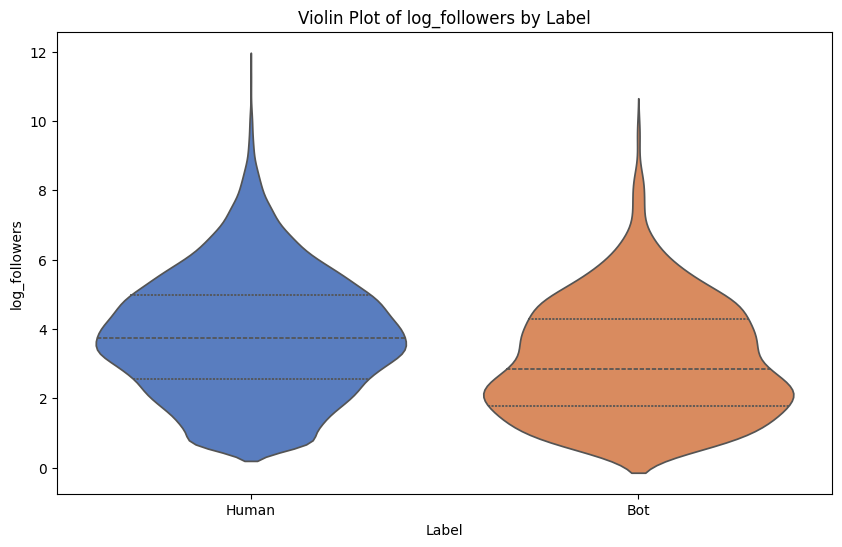

In [12]:
#6.使用Seaborn绘制图表
#绘制箱线图：展示不同label类别下log_followers的分布。
#绘制成对图：展示不同特征之间的成对关系，并根据label分类。
#绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
#绘制小提琴图：展示label与log_followers之间的分布差异。
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv', encoding='utf-8')
data.columns = data.columns.str.strip()  # 确保列名一致性

# 检查 followers 列的异常值
print(f"Original data size: {data.shape}")
print(f"Number of rows with followers <= 0: {(data['followers'] <= 0).sum()}")

# 数据清洗：移除 followers 列中 <= 0 的行
cleaned_data = data[data['followers'] > 0]
print(f"Cleaned data size: {cleaned_data.shape}")

# 计算 log_followers
cleaned_data['log_followers'] = np.log1p(cleaned_data['followers'])

# 确保其他 log 特征已计算
if 'log_public_repos' not in cleaned_data.columns:
    cleaned_data['log_public_repos'] = np.log1p(cleaned_data['public_repos'])
if 'log_public_gists' not in cleaned_data.columns:
    cleaned_data['log_public_gists'] = np.log1p(cleaned_data['public_gists'])
if 'log_following' not in cleaned_data.columns:
    cleaned_data['log_following'] = np.log1p(cleaned_data['following'])

# 数值特征列
numeric_columns = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']

# 设置 Jupyter Notebook 图形显示模式
%matplotlib inline

# 1. 绘制箱线图：不同 label 类别下 log_followers 的分布
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='label', y='log_followers', hue='label', palette='Set3')
plt.title('Boxplot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()

# 2. 绘制成对图：不同特征之间的成对关系，并根据 label 分类
sns.pairplot(cleaned_data, vars=numeric_columns, hue='label', palette='Set2', markers=["o", "s"])
plt.suptitle('Pairplot of Numeric Features by Label', y=1.02)
plt.show()

# 3. 绘制热图：数值特征之间的相关性
correlation_matrix = cleaned_data[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

# 4. 绘制小提琴图：label 与 log_followers 之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(data=cleaned_data, x='label', y='log_followers', hue='label', palette='muted', inner="quartile")
plt.title('Violin Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.show()


In [5]:
#7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。
import pandas as pd
from ydata_profiling import ProfileReport

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 生成数据分析报告
profile = ProfileReport(data, title="GitHub Bot Processed Data Report", explorative=True)

# 保存报告为 HTML 文件
profile.to_file("github_bot_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]
